### Q8: What season(quarter) is the worst for each product item? As example,

####       item1-> q1

 ####      item2-> q2

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [38]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  tim.quarter, it.item_name, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"GROUP BY CUBE( tim.quarter, it.item_name) "\
"ORDER BY it.item_name, SUM(t.quantity) ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Quarter', 'ItemName', 'Sales'])
df = df.dropna()
df['Sales'] = df['Sales'].astype('float64')
# # df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Quarter,ItemName,Sales
0,Q1,100% Juice Box Variety 6.75 oz,85470.0
1,Q4,100% Juice Box Variety 6.75 oz,87090.0
2,Q2,100% Juice Box Variety 6.75 oz,88140.0
3,Q3,100% Juice Box Variety 6.75 oz,90675.0
5,Q2,A&W Root Beer - 12 oz cans,65952.5
...,...,...,...
1288,Q3,Yoplait Original Yogurt Variety Pack,69132.0
1290,Q1,Zoo Animal Cookies/Crackers,76468.0
1291,Q2,Zoo Animal Cookies/Crackers,77112.0
1292,Q4,Zoo Animal Cookies/Crackers,77280.0


In [40]:
df = df.groupby('ItemName').head(1)
#df.first()
df

,Quarter,ItemName,Sales
0,Q1,100% Juice Box Variety 6.75 oz,85470.00
5,Q2,A&W Root Beer - 12 oz cans,65952.50
10,Q4,A&W Root Beer Diet - 12 oz cans,37725.75
15,Q1,Advil 2 pill packets,76342.00
20,Q1,All Purpose Cleaner 409 Spray,95850.00
...,...,...,...
1270,Q2,Welch's 100% Juice Variety10 oz,93398.00
1275,Q1,Wint O Green LifeSavers Sugar Free,85168.00
1280,Q1,Wonderful Pistachios (in shell),122716.00
1285,Q1,Yoplait Original Yogurt Variety Pack,65112.00


Text(0, 0.5, 'Total Sales in each month')

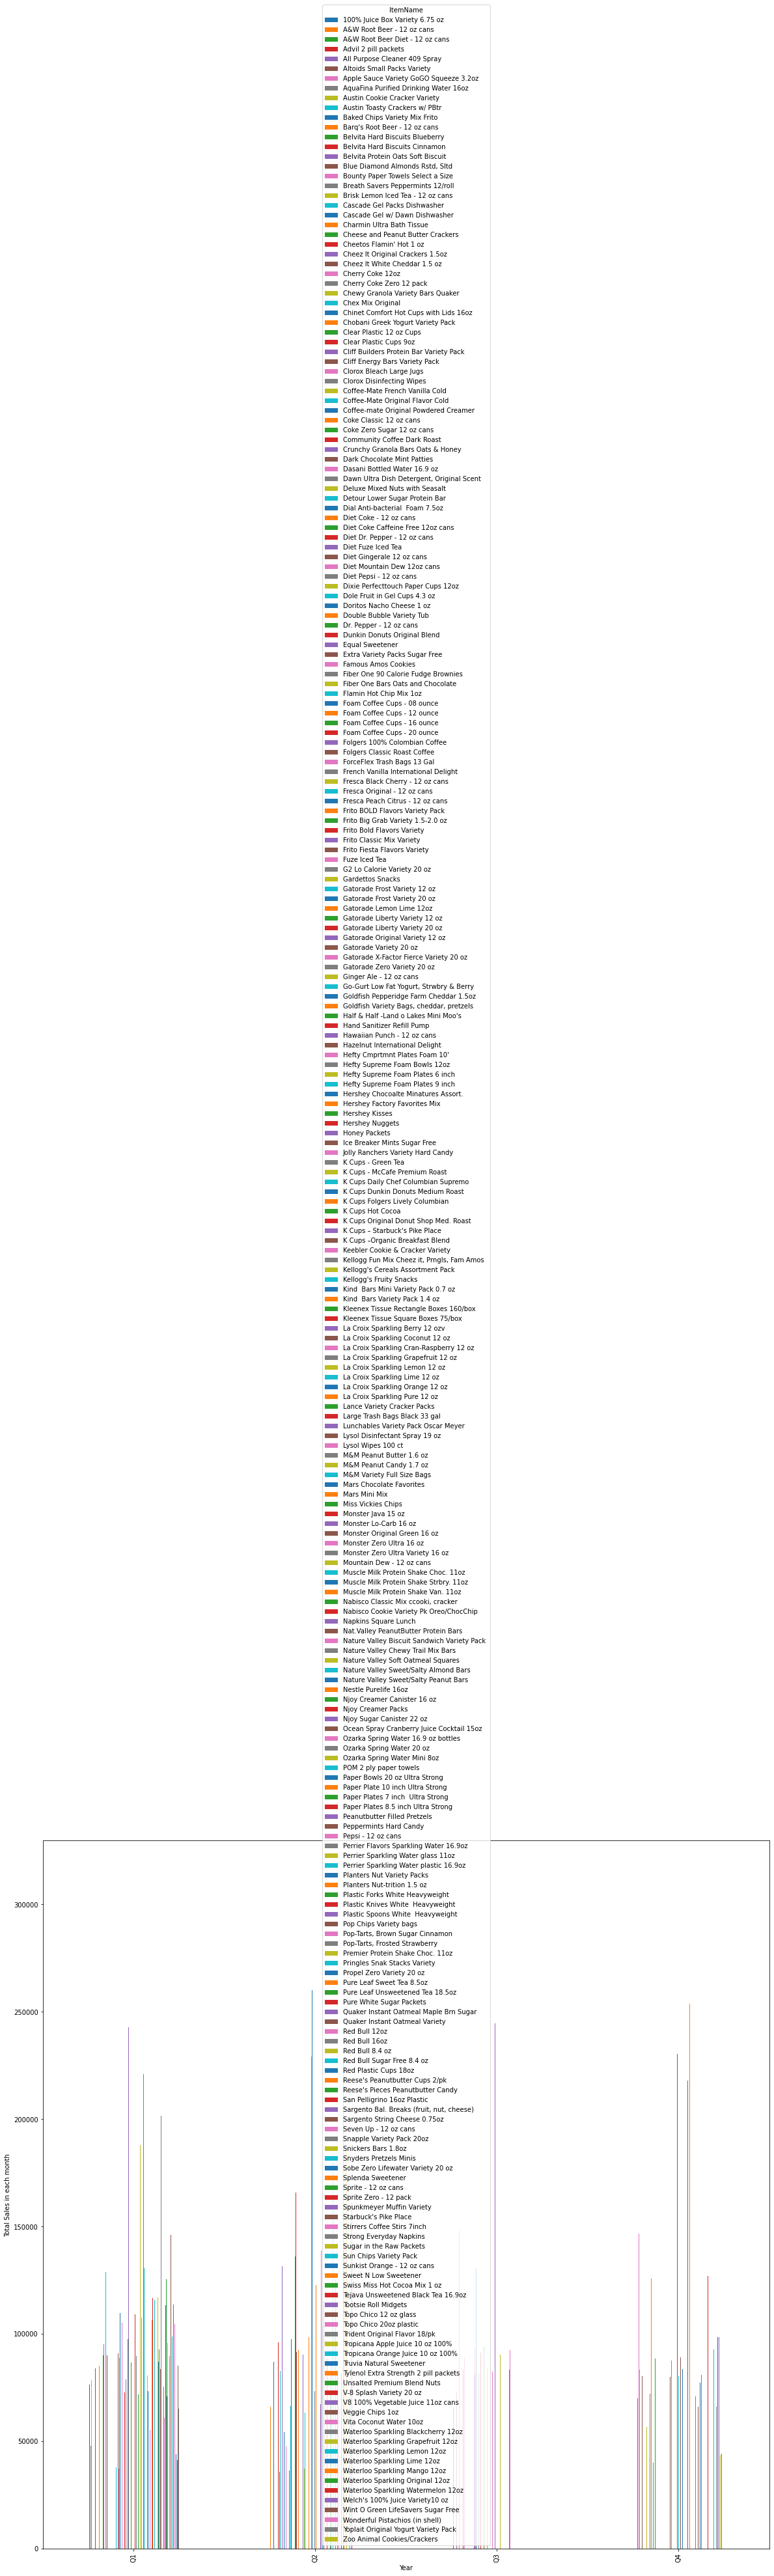

In [41]:
df_pivot = pd.pivot_table(df, values="Sales", index="Quarter", columns="ItemName")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 20)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each Quarter")


In [ ]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH grouped_sales AS (SELECT quarter, item_key, SUM(quantity) AS total_quantity " \
"FROM ecom_schema.fact_table f join ecom_schema.Time_dim t ON t.time_key = f.time_key 
"GROUP BY item_key,quarter)"\  
"SELECT CONCAT(s.item_key, '->',s.quarter, '(',total_quantity,')') " \
"FROM grouped_sales s JOIN (SELECT item_key, min(total_quantity) AS minq "\ 
"FROM grouped_sales s " \
"GROUP BY item_key) ss ON ss.item_key = s.item_key and s.total_quantity = ss.minq " 
        
cur.execute(select_stmt)
records = cur.fetchall()
records